## Para la explicación de este concepto veamos el dataset moons

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

**`eps`** define la distancia máxima que se considera para que dos puntos sean vecinos. Es el radio de la vecindad alrededor de un punto. Si la distancia entre dos puntos es menor o igual a eps, se consideran vecinos y potencialmente parte del mismo cluster.


In [49]:
X,y = make_moons(n_samples=1000, noise = 0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [52]:
#dbscan.labels_

In [45]:
#dbscan.core_sample_indices_

In [46]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

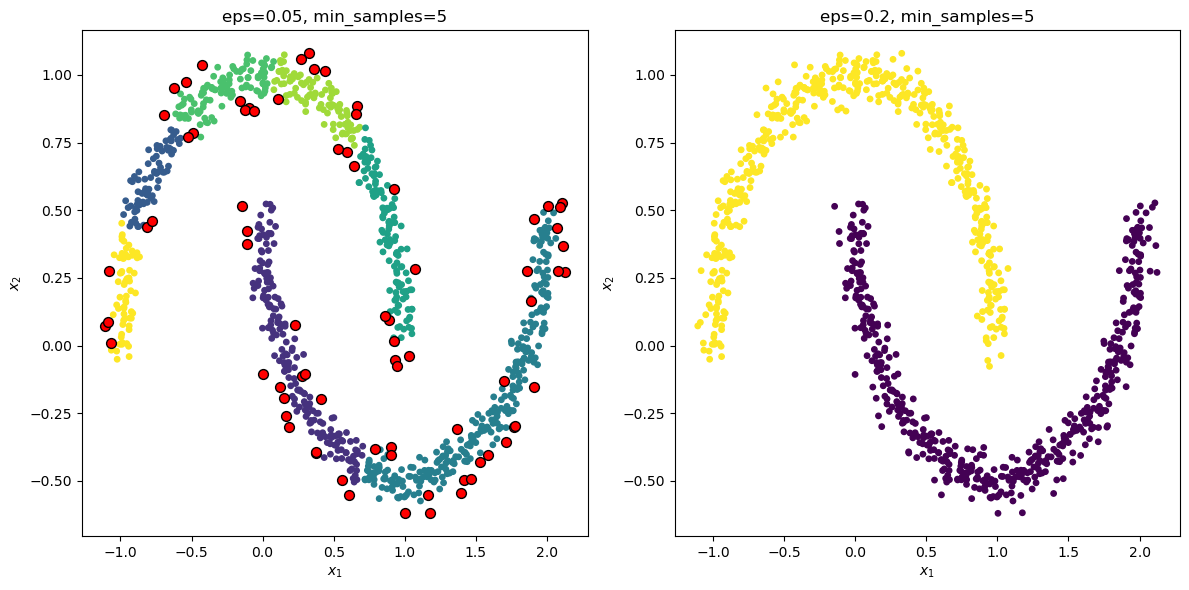

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_moons

# Generar datos de ejemplo
#X, _ = make_moons(eps=n_samples=1000, noise=0.05, random_state=42)

# Definir parámetros para DBSCAN
eps_values = [0.05, 0.2]
min_samples = 5

# Crear la figura
plt.figure(figsize=(12, 6))

for i, eps in enumerate(eps_values):
    # Crear y ajustar el modelo DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_dbscan = dbscan.fit_predict(X)
    
    # Crear el subplot
    plt.subplot(1, 2, i + 1)
    
    # Graficar los puntos
    plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=15)
    
    # Marcar los puntos ruido
    noise = y_dbscan == -1
    plt.scatter(X[noise, 0], X[noise, 1], c='red', s=50, edgecolors='k', label='Ruido')
    
    # Configurar título y etiquetas
    plt.title(f'eps={eps}, min_samples={min_samples}')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

plt.tight_layout()
plt.show()


## Veamos otro ejemplo 

Estos datos son los precios de casas y la antigüedad de la construción 

In [18]:
import pandas as pd 

In [33]:
#casas = pd.read_csv('casas.csv')
casas = np.loadtxt('casas.csv',delimiter=",")

In [40]:
cluster = DBSCAN(eps=2, min_samples =10).fit_predict(casas)

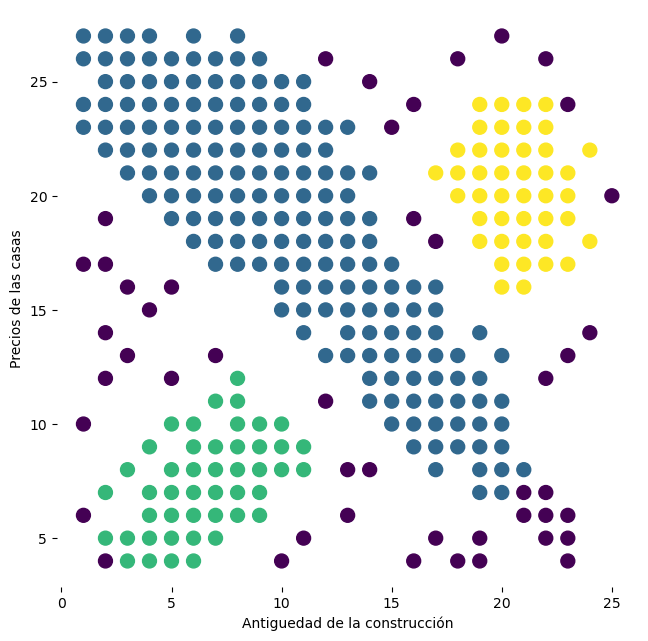

In [41]:
#Graficar para mostrar los clusters 
plt.figure(figsize=(7.5,7.5))
plt.scatter(casas[:,0],casas[:,1], c=cluster,s=100)
plt.xlabel("Antiguedad de la construcción")
plt.ylabel("Precios de las casas")
plt.box(False)
plt.show()

### Ejercicios Extras 

In [102]:
x,y = make_moons(n_samples=10000, noise = 0.05)

In [103]:
X = np.array(x)

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [73]:
dtree  = DecisionTreeClassifier()

In [75]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [107]:
parametros = {'criterion' : ('gini','Entropy'),
              'n_estimators': (10,20,30),
              'max_samples' : (1/3,2/3),
             'max_depth' : [2,4,6,8,10,12]}



search = GridSearchCV(dtree,
                       parametros,
                       scoring = 'accuracy',# % de distancias clasificadas correctamente
                       cv = 10
                      )
search.fit()

TypeError: BaseSearchCV.fit() missing 1 required positional argument: 'X'